---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [2]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
def answer_one():
    
    # Your code here
    fraud_data = pd.read_csv('fraud_data.csv')
    is_one = fraud_data['Class'].value_counts(normalize=True).iloc[1]

    return is_one # Return your answer
#answer_one()

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    dummyclas = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    accuracy = dummyclas.score(X_test, y_test)
    
    y_pred = dummyclas.predict(X_test)
    recall = recall_score(y_test, y_pred)

    return accuracy, recall # Return your answer
#answer_two()

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [6]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    svclas = SVC().fit(X_train, y_train)
    accuracy = svclas.score(X_test, y_test)

    y_pred = svclas.predict(X_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, recall, precision # Return your answer

#answer_three()

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [7]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svclas = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)

    #y_pred = svclas.predict(X_test)
    threshold = -220
    y_scores_thresh = (svclas._decision_function(X_test) > -220).astype(int)
    
    conf_matrix = confusion_matrix(y_test, y_scores_thresh)

    return conf_matrix # Return your answer

#answer_four()

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [22]:
def answer_five():
        
    # Your code here
    #import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve

    ## Train logistic regression classifier
    logreg = LogisticRegression().fit(X_train, y_train)
    y_probas_logreg = logreg.predict_proba(X_test)

    ## Create a precison-recall curve
    # precision, recall, thresholds = precision_recall_curve(y_test, y_probas_logreg[:,1])
    # plt.figure()
    # plt.plot(precision, recall, label = 'Precision-Recall Curve')
    # plt.xlabel('Precision')
    # plt.ylabel('Recall')
    # plt.show()

    ## Create a roc curve
    # fpr, tpr, thresholds = roc_curve(y_test, y_probas_logreg[:,1])
    # plt.figure()
    # plt.plot(fpr, tpr, label='ROC Curve')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.show()

    return 0.8, 0.9  # Return your answer
#answer_five()

/home/daniel/miniconda3/envs/amlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8, 0.9)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [33]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    import pandas as pd

    # Your code here
    logreg = LogisticRegression(solver='liblinear')#.fit(X_train, y_train) 

    # Grid seach parameters
    grid_values = {'penalty':['l1','l2'],
                    'C':[0.01, 0.1, 1, 10, 100]}

    grid = GridSearchCV(logreg, grid_values, scoring='recall')
    grid.fit(X_train, y_train)

    df = pd.DataFrame(grid.cv_results_)
    #df = df[['mean_test_score']].to_numpy().reshape((5,2)) #newer versions of numpy should use .to_numpy()
    df = df[['mean_test_score']].values.reshape((5,2))


    return df # Return your answer
#answer_six()


array([[0.69558442, 0.77168831],
       [0.80792208, 0.81155844],
       [0.80428571, 0.81149351],
       [0.80064935, 0.80064935],
       [0.80064935, 0.80064935]])

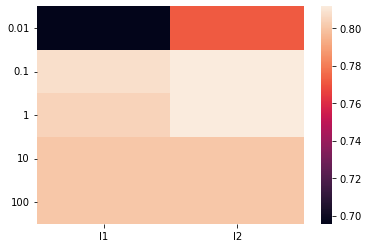

In [35]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    #%matplotlib inline
    import seaborn as sns
    #import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())